## 통계학 실험 4장 과제 

#### 1. 평균이 1로 같고 표준편차가 (1,2,3)인 세 정규분포의 밀도함수를 그리시오. 


파랑선 ~ N(1, 1^2)
주황선 ~ N(1, 2^2)
녹색선 ~ N(1, 3^2)



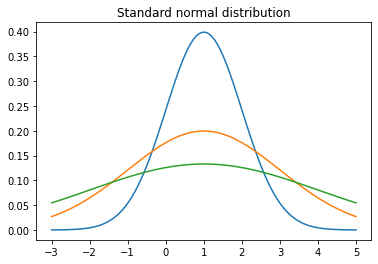

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

x = np.linspace(-3, 5, 100)

# X1 ~ N(1, 1^2)
X1 = norm.pdf(x, loc=1, scale=1)
# X2 ~ N(1, 2^2)
X2 = norm.pdf(x, loc=1, scale=2)
# X3 ~ N(1, 3^2)
X3 = norm.pdf(x, loc=1, scale=3)

print('''
파랑선 ~ N(1, 1^2)
주황선 ~ N(1, 2^2)
녹색선 ~ N(1, 3^2)
''')
plt.plot(x, X1)
plt.plot(x, X2)
plt.plot(x, X3)
plt.title('Standard normal distribution')
plt.show()

&nbsp;

#### 2. 자유도가 3인 카이제곱분포의 밀도함수를 0~10의 범위에 대해 그리시오.
(Hint : 정규분포의 확률밀도를 그리는 코드에서 `from scipy.stats import norm` 대신 `from scipy.stats import chi2` 를,
`fx = norm.pdf(x, loc = 0, scale = 1)` 대신 `fx = chi2.pdf(x, df = 3)` 으로 바꿔보세요. -3 ~ 3 의 범위도 0~10 으로 바꿔야합니다!)

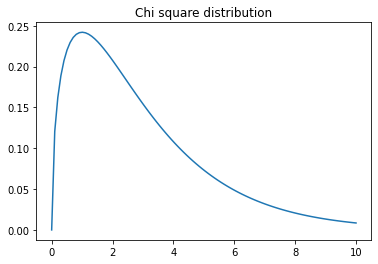

In [2]:
from scipy.stats import chi2

x = np.linspace(0, 10, 100)

# V ~ χ2(3)
V = chi2.pdf(x, df = 3)

plt.plot(x, V)
plt.title('Chi square distribution')
plt.show()

&nbsp;

#### 3. 자유도가 2인 카이제곱분포에서 200개의 표본을 추출하여 표본평균 $\overline{X}$를 구하는 실험을 2000회 반복하고, 이들 2000개의 표본평균들을 히스토그램으로 나타내보자. 
(Hint : 자유도가 k인 카이제곱분포에서 `chi2.rvs(df=k, size=n)` 으로 n개의 랜덤 표본을 생성할 수 있으며,  이 분포의 평균은 k, 분산은 2k 이다. 그리고 정규분포 그리는 범위 조정이 필요함.)


카이제곱분포의 표본평균은 감마분포 Gamma(nk/2, 2/n) 를 갖는다. (빨간 선)
이 분포는 중심극한정리에 의해 n이 클경우 정규분포 N(k, 2k/n) 로 근사할 수 있다. (하늘색 선)


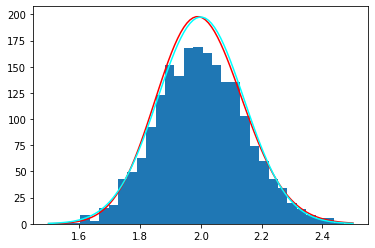

In [3]:
from scipy.stats import gamma

# Degree of freedom: 2
k = 2
# Sample size
n = 200

sample_mean = np.array([chi2.rvs(df=k, size=n) for _ in range(2000)]).mean(1)
x = np.linspace(0.75*k, 1.25*k, 100)
gamma = gamma.pdf(x, a=n*k/2, scale=2/n)*70
normal = norm.pdf(x, loc=k, scale=(2*k/n)**0.5)*70

print('''
카이제곱분포의 표본평균은 감마분포 Gamma(nk/2, 2/n) 를 갖는다. (빨간 선)
이 분포는 중심극한정리에 의해 n이 클경우 정규분포 N(k, 2k/n) 로 근사할 수 있다. (하늘색 선)''')
plt.plot(x, gamma, color='red')
plt.hist(sample_mean, bins=30)
plt.plot(x, normal, color='cyan')
plt.show()

&nbsp;

#### 4. 주어진 final.csv 데이터는 202x년도 2학기 통계학실험(000)의 수강생들의 기말고사 성적을 나타낸 것이다. 다음 질문에 답해보자
#### (단, 수강생은 총 100명이며, 기말고사는 100점 만점이다).

4-1. 000분반의 학생들의 기말고사 성적은 어떤 분포를 보이고 있는지를 히스토그램과 QQ-plot(분위수 대조도)를 그려보고 확인해보자.

*참고:
(1)의 경우 우선 다음과 같이 데이터를 불러오자:
```
final_pd = pd.read_csv("final.csv")

final_pd = final_pd.loc[:, "score"]

(final_pd는 작성자가 임의로 설정한 변수명이므로 자유롭게 바꿔 사용해도 무방)
```

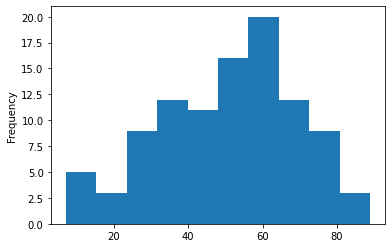

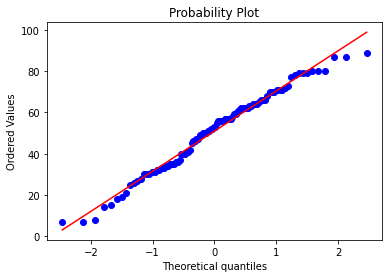

In [4]:
import gzip
import pandas as pd
from scipy.stats import probplot

score = pd.read_csv(gzip.open('final.csv.gz'))['score']

score.plot.hist(bins=10)
plt.show()
probplot(score, plot=plt)
plt.show()

&nbsp;

4-2. 000분반의 성적부여 방침은 상대평가로, 기말고사에서 상위 30% 내에 들면 A- 이상을 받는 것이다. 그러나 ETL에는 기말고사 성적의 평균이 50점, 표준편차가 20점이라고만 공지가 되었다. 학생의 입장에서는 자신의 점수만 알고 다른 학생들의 점수를 알 수 없는데, 그렇다면 자신이 받을 학점을 어떻게 예측할 수 있을까? 기말고사 성적의 분포가 정규분포라고 가정하고, A- 이상을 받을 수 있는 최소 성적을 구해보자(소수점은 모두 올림하여 구한다. 예를 들면 50.3점, 50.7점 모두 51점으로 계산).

In [5]:
from math import ceil
ceil(norm.ppf(1 - 0.3, loc=50, scale=20))

61

&nbsp;

4-3. 000분반의 성적부여 방침이 절대평가로 변경되어, 기말고사에서 70점 이상을 받으면 A- 이상을 받을 수 있다. 다시 기말고사 성적이 동일한 정규분포라고 가정하고, A-이상을 받는 수강생이 약 몇 명인지 구해보자(소수점은 모두 올림하여 구한다. 예를 들면 32.4명, 32.8명 모두 33명으로 계산). 

In [6]:
# 수강생 수
n = score.shape[0]

ceil(n * (1 - norm.cdf(70, loc=50, scale=20)))

16

&nbsp;

4-4. 000분반의 기말고사 성적의 산출 방식이 변경되어, 기존에 받았던 점수를 다음과 같이 변환하려고 한다:
$$\text{(새 점수)} = 0.9*\text{(기존 점수)} + 30$$

이 때, 새롭게 산출된 점수의 분포를 알아보기 위해 히스토그램과 QQ-plot을 그려보자. 점수가 변환되어도 여전히 정규분포와 비슷한가? 혹은 새로운 모양의 분포인가?


문제 4-1에서 그렸던 그래프와 비교했을 때, 그래프 scale만 변했고 모양은 완전히 같음을 알 수 있다.
기존 분포에 선형변환을 가해도, 분포의 모양은 변하지 않음을 확인할 수 있다.


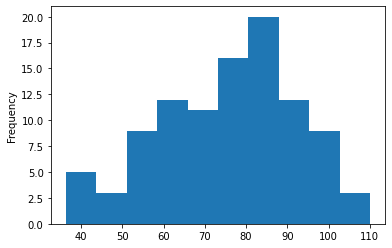

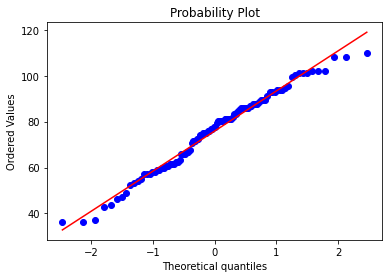

In [7]:
new_score = 0.9 * score + 30

print('''
문제 4-1에서 그렸던 그래프와 비교했을 때, 그래프 scale만 변했고 모양은 완전히 같음을 알 수 있다.
기존 분포에 선형변환을 가해도, 분포의 모양은 변하지 않음을 확인할 수 있다.''')

new_score.plot.hist(bins=10)
plt.show()
probplot(new_score, plot=plt)
plt.show()

&nbsp;

#### 5. 주어진 ames.txt 자료는 Iowa의 도시 Ames의 2006년부터 2010년 사이의 부동산 거래내역 자료이다. 5년 동안 이 지역에서 발생한 총 2930건의 부동산 거래내역이 모두 기록되어 있다. 본 예제에서는 집의 크기를 나타내는 변수인 Gr.Liv.Area를 모집단으로 사용하도록 한다. 다음의 질문에 답해보자. 

5-1. Gr.Liv.Area 데이터의 히스토그램과 QQ-plot을 그려보자. 정규분포와 가깝다고 할 수 있는가?


관대한 사람은 이것도 정규분포라고 할 수 있겠지만, 내가 보기엔 차마 정규분포와 비슷하다고 하기엔 skew가 너무 심한것같다.
정규분포와 가깝지 않다고 하겠다.


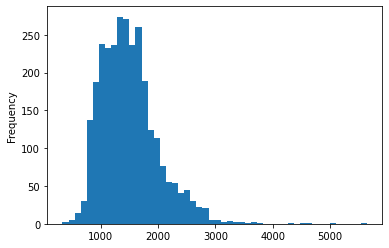

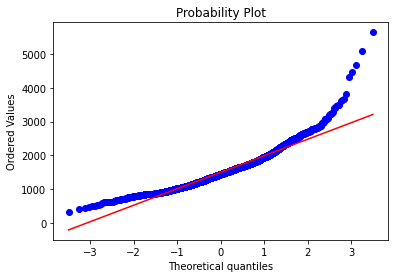

In [8]:
import lzma
area = pd.read_csv(lzma.open('ames.csv.xz'))['Gr.Liv.Area']

print('''
관대한 사람은 이것도 정규분포라고 할 수 있겠지만, 내가 보기엔 차마 정규분포와 비슷하다고 하기엔 skew가 너무 심한것같다.
정규분포와 가깝지 않다고 하겠다.''')
area.plot.hist(bins=50)
plt.show()
probplot(area, plot=plt)
plt.show()

&nbsp;

5-2. Gr.Liv.Area 데이터가 정규분포를 따른다고 가정하자. 우선 ```np.mean```과 ```np.std``` 함수를 이용하여 데이터의 평균과 분산을 구하고, 데이터가 해당 평균과 분산을 가지는 정규분포를 따른다고 가정하자. 이 때, 집 크기의 상위 5%의 집의 크기를 구하고, 실제 상위 약 5%의 집 크기와 비교해보자.<br>
(참고: 만약 실제로 정규분포를 따른다고 하더라도, 여기서 가정한 것처럼 데이터의 평균과 표준편차는 당연히 실제 분포의 평균과 표준편차는 아니다. 이 문제에 관해서는 차후에 추정과 검정을 배우면서 보다 자세히 공부를 하게 된다)


In [9]:
print(f'''
계산으로 얻은 상위 5% 집 크기 : {norm.ppf(1 - 0.05, loc=area.mean(), scale=area.std())}
실제 상위 5% 집 크기         : {np.percentile(area, 95)}

예측한 상위 5%와 실제 상위 5%가 상당히 유사하여, 정규분포로 근사한것이 유용했음을 확인할 수 있다.
''')


계산으로 얻은 상위 5% 집 크기 : 2331.178570700597
실제 상위 5% 집 크기         : 2463.0999999999995

예측한 상위 5%와 실제 상위 5%가 상당히 유사하여, 정규분포로 근사한것이 유용했음을 확인할 수 있다.

